Trabalho 1 - Hugo Felix

Introdução: O objetivo deste trabalho é fazer uma análise exploratória sobre o perfil dos aposentados. A base de dados utulizada é PNAD 2013. Será feita uma série de estudos qualitativos e quantitativos para que possamos entender, de fato, como são as caracteristicas das pessoas que se declaram aposentados. O foco da pesquisa é inserção dos aposentados a tecnolgia e como isso se comporta em relação ao nível de formação acadêmica. Cada observação será acompanhada de uma interpretação. Ao final do ensaio, será feita uma conclusão final sobre o público alvo. 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

#importantando todas as bibliotecas necessárias.

In [4]:
pnad = pd.read_csv('pes2013R.csv') #chamando a base de dados


In [491]:
aposentados = pnad[pnad["V9112"] == 2] #este primeiro filtro foi utilizado para separar os "aposentados" da grande tabela do PNAD. 

In [492]:
nomes = aposentados.rename(index=str, columns={'V0302': 'SEXO', "V4011": "ESTADO CIVIL", "V0601": "SABE LER/ESCREVER", "V6007": "CURSO + ELEVADO", "V06112":"TEM CELULAR", "V9001":"TRABALHA","V9005":"Nº DE TRABALHOS","V7122":"RENDIMENTO MENSAL", "V1252":"VALOR DA APOSENTADORIA","V1258":"OUTRO TIPO DE APOSENTADORIA"})
#usei este comando aqui em cima para trocar o nome das colunas

In [493]:
n = len(aposentados)

In [494]:
len(aposentados) #Este número está pequeno. Minha estimativa era maior para aposentados. 

2185

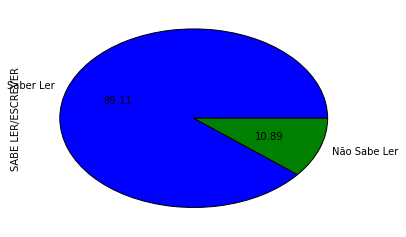

In [497]:
leitura = nomes[(nomes["SABE LER/ESCREVER"]==1) | (nomes["SABE LER/ESCREVER"]==3) ] #filtro para saber quantas pessoas sabem ler
leitura = leitura["SABE LER/ESCREVER"].astype('category')
leitura.cat.categories = ('Saber Ler', 'Não Sabe Ler')
z=leitura.astype('category')
leitura.value_counts().plot(kind='pie' ,autopct = "%0.2f")

In [498]:
leitura.value_counts() # Quantidade relativa a cada opção

Saber Ler       1947
Não Sabe Ler     238
Name: SABE LER/ESCREVER, dtype: int64

In [524]:
celular = nomes[(nomes["TEM CELULAR"]==1)| (nomes["TEM CELULAR"]==3)] #filtro para saber quantas pessoas possuem celular e quantas pessoas não possuem celular
#este filtro é interessante pois podemos compreender quantos aposentados tem ou não acesso a tecnologia

In [525]:
celular["TEM CELULAR"].describe() #Este estudo nos mostra que mais de 75% dos aposentados utiliza celular

count    2185.000000
mean        1.490618
std         0.860737
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: TEM CELULAR, dtype: float64

In [501]:
celular = nomes["TEM CELULAR"]

In [502]:
celular = celular.astype("category")

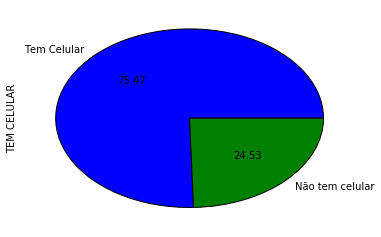

In [503]:
x=celular.astype('category')
celular.cat.categories = ('Tem Celular', 'Não tem celular')
celular.value_counts().plot(kind='pie',autopct = "%0.2f")

#podemos verificar pelo gráfico de uma forma mais intuitiva a mesma informação que a funcção describe() já nos forneceu. 
#Este gráfico ainda está muito "bruto" vamos lapidar mais os resultados para que possamos ter uma noção mais apurada sobre o número de aposentados com acesso a tecnologia. 

In [504]:
celular.value_counts() # Quantidade relativa a cada opção

Tem Celular        1649
Não tem celular     536
Name: TEM CELULAR, dtype: int64

In [526]:
trabalho = nomes[(nomes["TRABALHA"]==1) | (nomes["TRABALHA"]==3)] #filtro de aposentados que trablham ou não. No teste do número 1(pessoas que trabalham) e no teste 3(pessoas que não trabalham).
#No filtro composto foi possível perceber que nenhum dos aposentados declarou que trabalha. 

In [527]:
trabalho["TRABALHA"].value_counts() # Quantidade relativa a cada opção

3.0    2185
Name: TRABALHA, dtype: int64

In [509]:
b = trabalho["TRABALHA"]

In [510]:
b.describe() # detalhes da coluna

count    2185.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: TRABALHA, dtype: float64

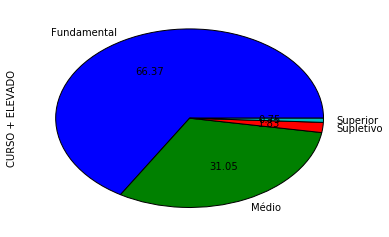

In [508]:
curso = nomes[(nomes["CURSO + ELEVADO"]==4) | (nomes["CURSO + ELEVADO"]==5) | (nomes["CURSO + ELEVADO"]==7) | (nomes["CURSO + ELEVADO"]==8) | (nomes["CURSO + ELEVADO"]==9)] #Filtro composto. (4) Fundamental, (5) Médio, (7) Supletivo, (8) Superior e (9) Mestrado/Doutorado. 
curso = curso["CURSO + ELEVADO"].astype('category')
curso.cat.categories = ('Fundamental', 'Médio','Supletivo','Superior')
y=curso.astype('category')
curso.value_counts().plot(kind='pie' ,autopct = "%0.2f")

#podemos constatar que a maiora dos aposentados só tem até o ensino fundamental completo(66,37%). Pouco menos de um terço(31,05%) terminaram o ensino médio e pouco menos (3%) chegaram ao nível de ensino superior. Nenhum dos aposentados chegou até o último filtro (9) Mestrado/Doutorado. 

In [511]:
curso.value_counts() # Quantidade relativa a cada opção

Fundamental    979
Médio          458
Supletivo       27
Superior        11
Name: CURSO + ELEVADO, dtype: int64

In [528]:
trabalhos = nomes[(nomes["Nº DE TRABALHOS"]== 1) | (nomes["Nº DE TRABALHOS"]== 3) | (nomes["Nº DE TRABALHOS"]== 5)] #Filtro composto de nº de trabalhos. Como vimos no filtro de aposentados, nesta PNAD nenhum dos asposentados relatou trabalhar, logo, o filtro por nº de empregos gerou o resultado zero. 
trabalhos["Nº DE TRABALHOS"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Nº DE TRABALHOS, dtype: float64

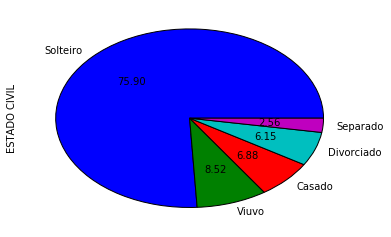

In [513]:
civil = nomes[(nomes["ESTADO CIVIL"]==1) | (nomes["ESTADO CIVIL"]==3) | (nomes["ESTADO CIVIL"]==5) | (nomes["ESTADO CIVIL"]==7) | (nomes["ESTADO CIVIL"]==0)]#Filtro composto. (0) Solteiro, (1) Casado, (3) Separado, (5) Divorciado e (7) Viuvo. 
civil = civil["ESTADO CIVIL"].astype("category")
civil.cat.categories = ('Solteiro', "Casado", 'Separado','Divorciado','Viuvo')
civil.value_counts().plot(kind='pie' ,autopct = "%0.2f")

 #Contrariando o senso comum de que a maioria dos aposentados seria casado ou viuvo. O filtro nos mostra que (75,9%) dos aposentados se diz solteiro. O restante dos aposentados está diluido entre casados(6,88%), divorciados(6,15%), separados(2,56%) e viuvos(8,52). 

In [514]:
civil.value_counts() # Quantidade relativa a cada opção

Solteiro      1247
Viuvo          140
Casado         113
Divorciado     101
Separado        42
Name: ESTADO CIVIL, dtype: int64

In [515]:
x1 =pd.crosstab(celular,curso)
x1
#Contrariando o senso comum de que, quanto mais instruido for a pessoa, maior a inserção a tecnologia. Esse crosstab nos mostra que os aposentados que tiveram cursaram apenas o ensino fundamental também tem contato com a tecnologia. 
#Tem celular = 1155 aposentados: fundamental(64,41%), médio(33,24%), supletivo(1,73%) e superior(0,6%).
#Não Tem Celular = 320 aposentados: fundamental(73,43%), médio(23,12%), supletivo(2,18%) e superior(1,25).


CURSO + ELEVADO,Fundamental,Médio,Supletivo,Superior
TEM CELULAR,,,,
Tem Celular,744,384,20,7
Não tem celular,235,74,7,4


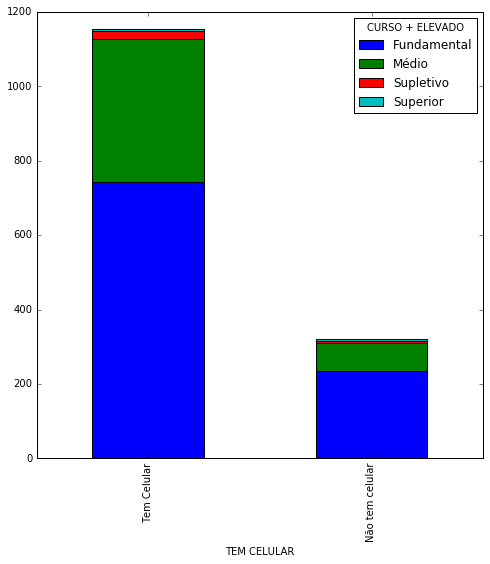

In [516]:
x1.plot(kind='bar', stacked=True,  figsize= ([8,8]))
#Este gráfico nos da uma noção mais tangível de que grau de escolaridade não é um empecilho para o acesso a tecnologia. 

In [519]:
x4 = pd.crosstab(celular, leitura)
x4
#Este crosstab é muito importante para a pesquisa pois, ele nos apresenta que pessoas não afabetizadas, ou seja, que não saber ler/escrever também utilizam tecnologia(56,3%). 
#Tem celular = 1649: Sabem ler(91,87%) e não sabem ler(8,13%).
#Não tem celular = 536: Sabem ler(80,59%) e não sabem ler(19,4%).
#Não saber ler = 238: Tem celular(56,3%) e não tem celular(43,69%).

SABE LER/ESCREVER,Saber Ler,Não Sabe Ler
TEM CELULAR,,
Tem Celular,1515,134
Não tem celular,432,104


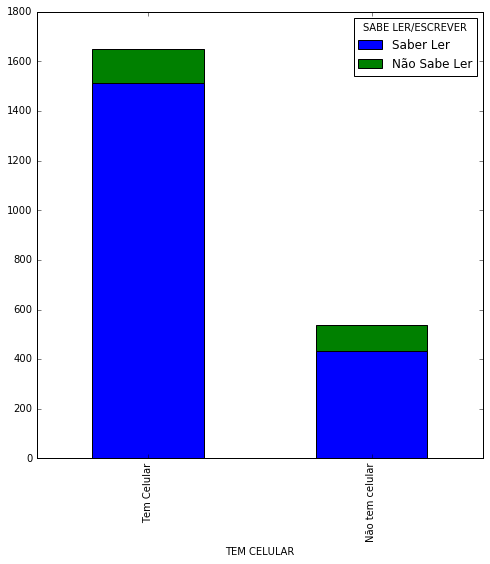

In [520]:
x4.plot(kind='bar', stacked=True,  figsize= ([8,8]))
#Este gráfico nos da uma noção mais tangível de que não ser alfabetizado, não é um empecilho para o acesso a tecnologia. 

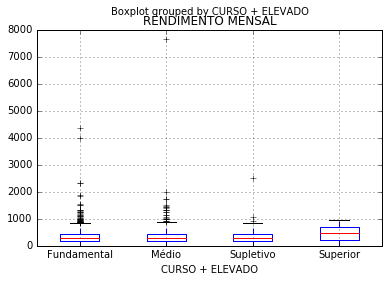

In [521]:
nomes["RENDIMENTO MENSAL"] = nomes.V4750
nomes["CURSO + ELEVADO"] = y
nomes[nomes.V4750!=999999999999].boxplot(column="RENDIMENTO MENSAL", by = "CURSO + ELEVADO")

#Neste bloxplot é possível percerber valores out lines em todos os níveis de ensino. Como o curso superior apresentou 11 aposentados, um número pequeno para a amostra. o nível superior não apresentou nenhum out line. 
#É visível que a maioria dos out lines se concentra onde a maioria do nível escolar dos aposentados também se contra. Nas classes de Ensino Fundamental e Ensino Médio. 
#Não podemos usar a média nesse gráfico, pois os valores out lines viezarião todos os valores da média
. 

Conclusão: Com base nos estudos feitos na população de aposentados da PNAD de 2013, podemos afirmar que: A grande maioria 97% dos aposentados não cursarão o ensino superior. A ausência de um ensino mais avançado não impediu que os aposentados tivessem acesso a tecnologia. Aproximadamente 98% dos aposentados que estudaram até o ensino médio, possuem um celular. 

Um dado interessante é que 56,3% das pessoas que se declararam analfabetos utilizam celular. Este número nos diz que ser alfabetizado ou não, não é uma barreira para o uso de tecnologia. 

Outro dado curioso é que a grande maioria (75,9%) dos aposentados se declara solteiros. Contrariando o sendo comum de que esse público de estudo seria formado na sua maioria de casados, separados e viuvos. 